Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not.

You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

- k-Nearest Neighbour
- Decision Tree
- Support Vector Machine
- Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

- Jaccard index
- F1-score
- LogLoass

This final project will be graded by your peers who are completing this course during the same session. This project is worth 25 marks of your total grade, broken down as follows:

Building model using KNN, finding the best k and accuracy evaluation (7 marks)

Building model using Decision Tree and find the accuracy evaluation (6 marks)

Building model using SVM and find the accuracy evaluation (6 marks)

Building model using Logistic Regression and find the accuracy evaluation (6 marks)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


### Download dataset

In [3]:
#!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

import urllib.request
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'
filename= 'loan_train.csv'
urllib.request.urlretrieve(url, filename)

('loan_train.csv', <http.client.HTTPMessage at 0x1c7102b86a0>)

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Convert to date time object

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data Visualization and pre-processing

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


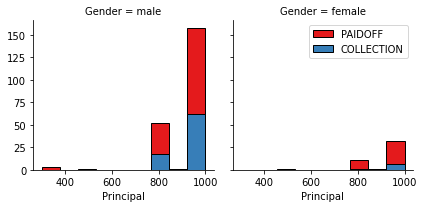

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Encode Male/Female

In [9]:
df['Gender'].replace(to_replace=['male', 'female'], value=[0, 1], inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


### Education

In [10]:
df.groupby('education')['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [11]:
df.education.value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_edu = enc.fit_transform(np.array(df.education).reshape(-1, 1))

In [13]:
enc.categories_

[array(['Bechalor', 'High School or Below', 'Master or Above', 'college'],
       dtype=object)]

In [14]:
X_edu.toarray()

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [15]:
df_edu = pd.DataFrame(X_edu.toarray(), columns=enc.categories_)
df_edu.head()

,Bechalor,High School or Below,Master or Above,college
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [16]:
df_edu.drop('Master or Above', axis=1, inplace=True)

### Day in the week

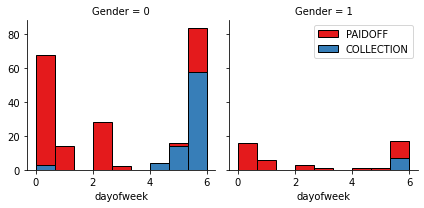

In [17]:
df['dayofweek'] = df['effective_date'].dt.dayofweek

bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [18]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x > 3) else 0)

### Select features

In [19]:
cols = ['Principal', 'terms', 'age', 'Gender', 'weekend']

X = pd.concat((df[cols], df_edu), axis=1)
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if (x == 'COLLECTION') else 1)

In [20]:
y = df['loan_status']
y

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    0
343    0
344    0
345    0
Name: loan_status, Length: 346, dtype: int64

## Scale data

In [50]:
X

,Principal,terms,age,Gender,weekend,"(Bechalor,)","(High School or Below,)","(college,)"
0,1000,30,45,0,0,0.0,1.0,0.0
1,1000,30,33,1,0,1.0,0.0,0.0
2,1000,15,27,0,0,0.0,0.0,1.0
3,1000,30,28,1,1,0.0,0.0,1.0
4,1000,30,29,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
341,800,15,32,0,1,0.0,1.0,0.0
342,1000,30,25,0,1,0.0,1.0,0.0
343,800,15,39,0,0,0.0,0.0,1.0
344,1000,30,28,0,0,0.0,0.0,1.0


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

## Train test split

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42)

## Load model libraries

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import jaccard_score, f1_score, log_loss
from sklearn.metrics import accuracy_score

In [62]:
def score_print(y_test, y_pred):
    """Print out the 3 scores"""
    print('Jaccard Score is: ', jaccard_score(y_test, y_pred))
    print('F1-score is: ', f1_score(y_test, y_pred))

### KNN

In [67]:
param = {'n_neighbors': list(range(2, 10))}
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, param)
clf.fit(X_train, y_train)
y_pred = clf.best_estimator_.predict(X_test)
score_print(y_pred, y_test)
print('Accuracy score for KNN is ', accuracy_score(y_test, y_pred), ' with ', clf.best_params_)

Jaccard Score is:  0.7611940298507462
F1-score is:  0.864406779661017
Accuracy score for KNN is  0.7714285714285715  with  {'n_neighbors': 5}


In [64]:
clf.best_params_

{'n_neighbors': 5}

In [ ]:
from sklearn.metrics

### Decision Tree

In [70]:
param = {'max_depth': [2, 3, 4, 5], 'min_samples_split': [2, 5, 10, 15, 20]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, param)
clf.fit(X_train, y_train)
y_pred = clf.best_estimator_.predict(X_test)
print('Best estimator ', clf.best_estimator_)
score_print(y_pred, y_test)
print('Accuracy score for Decision Tree is ', accuracy_score(y_test, y_pred))

Best estimator  DecisionTreeClassifier(max_depth=2)
Jaccard Score is:  0.8
F1-score is:  0.888888888888889
Accuracy score for Decision Tree is  0.8


### SVC

In [71]:
param = {'C': [0.001, 0.1, 1, 5, 10], 'kernel': ['linear', 'poly', 'rbf']}
svc = SVC()
clf = GridSearchCV(svc, param)
clf.fit(X_train, y_train)
y_pred = clf.best_estimator_.predict(X_test)
print('Best estimator ', clf.best_estimator_)

score_print(y_pred, y_test)
print('Accuracy score for SVC is ', accuracy_score(y_test, y_pred))

Best estimator  SVC(C=1, kernel='linear')
Jaccard Score is:  0.6567164179104478
F1-score is:  0.7927927927927927
Accuracy score for SVC is  0.6714285714285714


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 3, 11],
       [12, 44]], dtype=int64)

### Logistic regression

In [73]:
param = {'C': [0.001, 0.1, 1, 5, 10]}
log_reg = LogisticRegression()
clf = GridSearchCV(log_reg, param)
clf.fit(X_train, y_train)
y_pred = clf.best_estimator_.predict(X_test)
print('Best estimator ', clf.best_estimator_)

score_print(y_pred, y_test)
print('log_loss: ', log_loss(y_test, y_pred))
print('Accuracy score for Logistic Regression is ', accuracy_score(y_test, y_pred))

Best estimator  LogisticRegression(C=1)
Jaccard Score is:  0.6865671641791045
F1-score is:  0.8141592920353982
log_loss:  10.361758569497951
Accuracy score for Logistic Regression is  0.7
